In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from ulam import *

with UlamModel(stan_file="ulam_models/example.stan") as u:
    # Should go to the data block
    N = u.data('N', u.integer(lower=0))
    x = u.data('x', u.vector(N), missing_data=True)
    y = u.data('y', u.vector(N), missing_data=True)

    # Should go to the parameters block
    mu_x = u.parameter('mu_x', u.real())
    sigma_x = u.parameter('sigma_x', u.real(lower=0.01))

    intercept = u.parameter('intercept', u.real())
    slope = u.parameter('slope', u.real())
    error = u.parameter('error', u.real(lower=0.01))

    # The block location for this for loop should be inferred automatically
    # from the analysis of the generated AST and form "type analysis" of
    # the variables
    for i in u.range('i', 1, N):
        x[i] ^ u.Normal(mu_x, sigma_x)
        # Uppercase because in Ulam distributions are uppercase and functions are lowercase
        y[i] ^ u.Normal(x[i] * slope + intercept, error)

15:19:27 - cmdstanpy - INFO - compiling stan file /home/tmbb/Projects/sideprojects/python/ulam/ulam_models/example.stan to exe file /home/tmbb/Projects/sideprojects/python/ulam/ulam_models/example
15:19:38 - cmdstanpy - INFO - compiled model executable: /home/tmbb/Projects/sideprojects/python/ulam/ulam_models/example


15:20:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:20:38 - cmdstanpy - INFO - CmdStan done processing.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x[7],2.193,0.333,1.572,2.808,0.004,0.003,6420.0,2959.0,1.0
x[17],2.745,0.335,2.105,3.354,0.004,0.003,6545.0,2709.0,1.0
x[27],2.525,0.323,1.890,3.098,0.004,0.003,6602.0,2780.0,1.0
x[37],3.665,0.344,2.998,4.291,0.004,0.003,6392.0,2805.0,1.0
x[47],3.338,0.343,2.717,3.971,0.004,0.003,6069.0,3060.0,1.0
x[57],3.263,0.336,2.628,3.880,0.004,0.003,6933.0,2708.0,1.0
x[67],2.992,0.334,2.387,3.648,0.004,0.003,5980.0,2833.0,1.0
y[6],2.633,0.333,2.032,3.286,0.004,0.003,5813.0,3164.0,1.0
y[26],1.787,0.332,1.123,2.373,0.004,0.003,5984.0,2734.0,1.0
y[46],2.100,0.340,1.445,2.727,0.004,0.003,6844.0,2494.0,1.0


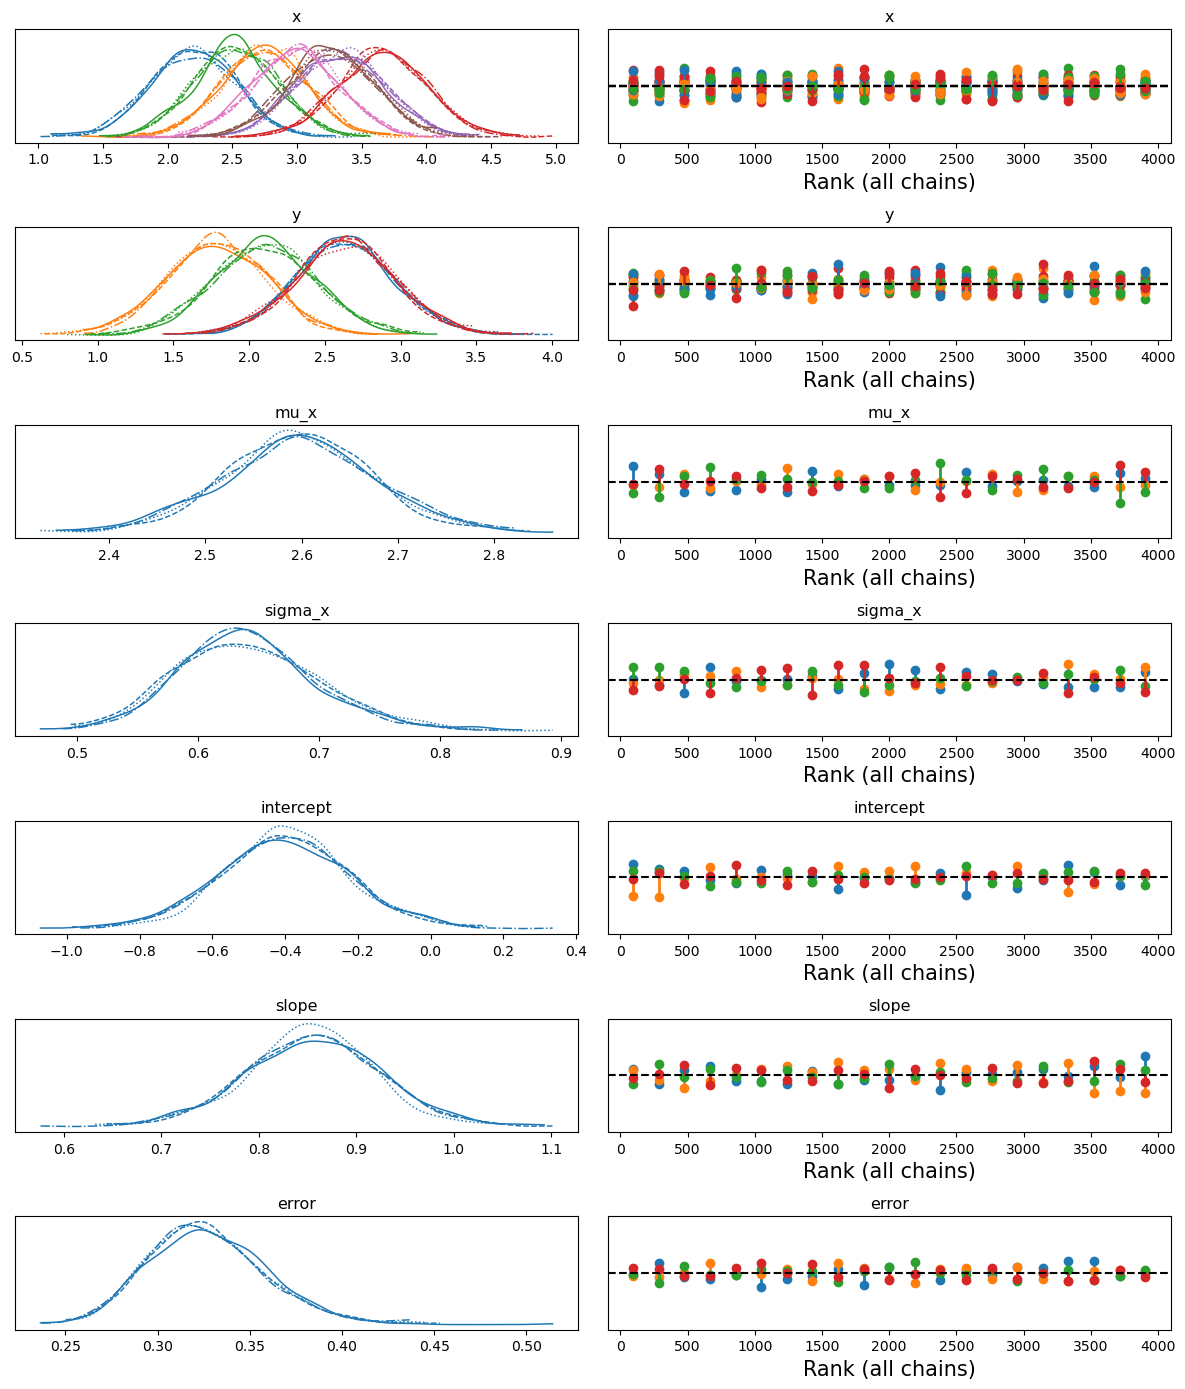

In [48]:
import numpy
import pandas
import scipy.stats
from matplotlib import pyplot

slope = 0.89
intercept = -0.5
error = 0.3

N = 70
x_full = scipy.stats.norm.rvs(size=N, loc=2.5, scale=0.7)
y_full = scipy.stats.norm.rvs(size=N, loc=(x_full * slope + intercept), scale=error)

x = pandas.Series([(i % 5 == 2 and i % 2 == 1) and numpy.NaN or x_i for (i, x_i) in enumerate(x_full)])
y = pandas.Series([(i % 4 == 2 and i % 5 == 1) and numpy.NaN or y_i for (i, y_i) in enumerate(y_full)])

data = dict(N=N, x=x, y=y)

idata = u.sample(data=data)

axes = arviz.plot_trace(
    idata,
    kind='rank_vlines'
)

fig = axes[0, 0].get_figure()
fig.tight_layout()

arviz.summary(idata)